In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import recall_score, make_scorer, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG, display
# import shap

import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
import pandas as pd
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
# from pycaret.classification import *
import lightgbm as lgb
from sklearn.metrics import recall_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
# from skopt.space import Real, Integer, Categorical
# from skopt import gp_minimize, space
from functools import partial
from sklearn.metrics import average_precision_score
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
# from functools import partial
# from skopt import gp_minimize
# from skopt import space
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('/content/sample_data/Best_dataset_fp.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
X = train_df.drop(['TenYearCHD'], axis = 1)
y = train_df['TenYearCHD']
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from mlxtend.classifier import StackingCVClassifier



# Define the wrapper class for Keras models
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict_proba(self, X):
        predictions = self.model.predict(X)
        proba = predictions.flatten()
        proba = np.vstack([1 - proba, proba]).T
        return proba

# Define the base models
optimized_model = Sequential()
optimized_model.add(Dense(units=298, activation='relu', input_dim=X.shape[1]))
optimized_model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.007119418600172993)
optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy')

neural_network_model = KerasWrapper(optimized_model)

xgboost_model = XGBClassifier(max_depth = 4, n_estimators = 399, learning_rate = 0.14376998191774137,
                              subsample = 0.646680904808694, colsample_bytree = 0.6279281044874794, min_child_weight = 7.707299055505381)

gb_model = GradientBoostingClassifier(learning_rate = 0.024998785901829815, max_depth = 5, subsample = 0.6593086507635105,
                          max_features = 0.5352246704995934, n_estimators = 62, min_samples_split = 34, min_samples_leaf = 11)

random_forest_model = RandomForestClassifier(n_estimators=39, max_depth=6, criterion='entropy')
lr_model = LogisticRegression(C = 100.0, penalty = 'l2', solver = 'saga')

# Define meta model
meta_model = LogisticRegression()

# Define stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define stacking classifier with base models and meta model
stacking_clf_xgb4 = StackingCVClassifier(classifiers = [neural_network_model, xgboost_model, gb_model, random_forest_model, lr_model],
                                    meta_classifier=meta_model,
                                    cv=5,
                                    stratify=True,
                                    shuffle=True,
                                    use_probas=True,
                                    use_features_in_secondary=True,
                                    verbose=2)

# Define metric as ROC
metric = roc_auc_score

# Fit the stacking classifier
stacking_clf_xgb4.fit(X.values, y.values)


# Make predictions
y_pred = stacking_clf_xgb4.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)



Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f011042d7b0>)
Training and fitting fold 1 of 5...
17/17 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
17/17 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
17/17 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
17/17 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
17/17 [==============================] - 0s 3ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    stacking_clf_xgb4.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = stacking_clf_xgb4.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0110c93640>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 5ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 6ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 1ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0101b6ff70>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f01102e8070>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0110d0ead0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f01012d64a0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f010116dcc0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 1ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f010116db40>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fafbd690>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa64da50>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa50b2b0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa5bcd30>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa5bee00>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa27bbb0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 3ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa2d8c40>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00f9ff72b0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa0b2980>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00ebe11150>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 3ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00ebdff820>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00eadb22f0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00e84845e0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00e737d270>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00e5a9df30>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa3fdde0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f01104dca60>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0110c63850>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00e59dd2a0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00eacf7280>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00ebe2a5c0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 3ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00ebe2bcd0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa49d300>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa58a6e0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0101199c30>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0101bdb0d0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0110d2b370>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f0101bfb190>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f01102740d0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f010117edd0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa467910>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa263d90>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa178400>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 3ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa17b2e0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00ebe1c250>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00e49a5a80>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f01012690f0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00fa60a770>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00e844af80>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00edf76aa0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00edf77df0>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 3ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f00faefcb20>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

Fitting 5 classifiers...
Fitting classifier1: keraswrapper (1/5)
KerasWrapper(model=<keras.engine.sequential.Sequential object at 0x7f01012c1930>)
Training and fitting fold 1 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 2 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 3 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 4 of 5...
14/14 [==============================] - 0s 2ms/step
Training and fitting fold 5 of 5...
14/14 [==============================] - 0s 2ms/step
Fitting classifier2: xgbclassifier (2/5)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6279281044874794, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
         

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Define the wrapper class for Keras models
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        self.model.fit(X, y)
    
    def predict_proba(self, X):
        predictions = self.model.predict(X)
        proba = predictions.flatten()
        proba = np.vstack([1 - proba, proba]).T
        return proba

# Define the base models
# Define the base models
optimized_model = Sequential()
optimized_model.add(Dense(units=298, activation='relu', input_dim=X.shape[1]))
optimized_model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.007119418600172993)
optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy')

neural_network_model = KerasWrapper(optimized_model)

xgboost_model = XGBClassifier(max_depth = 4, n_estimators = 399, learning_rate = 0.14376998191774137,
                              subsample = 0.646680904808694, colsample_bytree = 0.6279281044874794, min_child_weight = 7.707299055505381)

gb_model = GradientBoostingClassifier(learning_rate = 0.024998785901829815, max_depth = 5, subsample = 0.6593086507635105,
                          max_features = 0.5352246704995934, n_estimators = 62, min_samples_split = 34, min_samples_leaf = 11)

random_forest_model = RandomForestClassifier(n_estimators=39, max_depth=6, criterion='entropy')
lr_model = LogisticRegression(C = 100.0, penalty = 'l2', solver = 'saga')


# # set the weights for each classifier
# weights = [0.99, 0.993, 1.004, 1.006, 1.007]
weights = [1.5, 1, 1, 1, 1.5] # 0.318
# weights = [1.3, 0.6, 1.4, 0.6, 1.4]


classifiers = [neural_network_model, xgboost_model, gb_model, random_forest_model, lr_model]

# create the ensemble classifier
ensemble_SVW_O = EnsembleVoteClassifier(clfs=classifiers, voting='soft', weights = weights, verbose=1)

# fit the ensemble classifier on the training data
ensemble_SVW_O.fit(X, y)

from sklearn.metrics import average_precision_score



# Make predictions
y_pred = ensemble_SVW_O.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)



Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
84/84 [==============================] - 1s 2ms/step - loss: 0.4395
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
21/21 [==============================] - 0s 2ms/step
AUPRC: 0.3112937899728293


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    ensemble_SVW_O.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = ensemble_SVW_O.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4465
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4338
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4402
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4366
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4451
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4426
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4390
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4489
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4354
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4314
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4326
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4497
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4374
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4343
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4404
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4521
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4492
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 1ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4464
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 4ms/step - loss: 0.4342
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4364
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4442
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4423
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4293
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4421
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4549
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4424
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4466
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4391
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4406
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4418
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4367
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4415
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4503
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4404
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4422
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4337
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4434
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4405
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 1ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4315
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4350
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4447
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 6ms/step - loss: 0.4409
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4472
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4400
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4539
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 1ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4405
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 0s 2ms/step - loss: 0.4573
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 3ms/step - loss: 0.4406
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 2s 3ms/step - loss: 0.4491
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step


Fitting 5 classifiers...
Fitting clf1: keraswrapper (1/5)
67/67 [==============================] - 1s 2ms/step - loss: 0.4414
Fitting clf2: xgbclassifier (2/5)
Fitting clf3: gradientboostingclassifier (3/5)
Fitting clf4: randomforestclassifier (4/5)
Fitting clf5: logisticregression (5/5)
17/17 [==============================] - 0s 2ms/step
PR AUC scores: [0.28913093260615685, 0.3176392415776459, 0.33865640267979735, 0.38350516559564346, 0.3857002764741272, 0.39379700845431376, 0.31470323312356385, 0.2879355761533104, 0.33547206642472743, 0.3344013534856112, 0.2705129486604148, 0.28773323020229313, 0.3504469287760851, 0.4030543023766945, 0.32169239158211976, 0.3483622754206326, 0.3539517636180863, 0.32892435489692484, 0.28284584967135606, 0.3277611575624709, 0.37953559113300583, 0.30169382778315956, 0.2904659844348636, 0.3388783709726533, 0.3019426227684737, 0.34289550623237774, 0.3358715011723919, 0.303327666686701, 0.33280683340687056, 0.303804208534957, 0.3258949936627553, 0.34969268

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'learning_rate': 0.024998785901829815, 'max_depth': 5, 'subsample': 0.6593086507635105,
          'max_features': 0.5352246704995934, 'n_estimators': 62, 'min_samples_split': 34, 'min_samples_leaf': 11}


# Train the model
model = GradientBoostingClassifier(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)


AUPRC: 0.32135003263280887


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    model.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


PR AUC scores: [0.27978480974743847, 0.28803176010421166, 0.33964565190370616, 0.3964323980514589, 0.34466250828463874, 0.33950958771381623, 0.34391780312756864, 0.262621457665221, 0.3288197358720021, 0.33822540613888186, 0.2662778120712578, 0.2760835723493187, 0.3367146073363239, 0.45001217890703077, 0.273839066035762, 0.32037877615255134, 0.35095539530864683, 0.2980041536755427, 0.2801692939127861, 0.3208265174885092, 0.36991112857280195, 0.30089751967719297, 0.27405683896174576, 0.3287502684267688, 0.29243508401421636, 0.31903299393412504, 0.3613333007071185, 0.2821320887455845, 0.2962773783691569, 0.2958148094669302, 0.2876159348531316, 0.35830727137751084, 0.2868711710242126, 0.31510627402514785, 0.3181949778551382, 0.36457694594408374, 0.28802476293332135, 0.3005076991744001, 0.35865079921937226, 0.2704934187308193, 0.31061118199611076, 0.2727124144648201, 0.32336441771145813, 0.31226537545229993, 0.32931232876511635, 0.3762192059531769, 0.2764638898713364, 0.28537190143066743, 0

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

optimized_model = Sequential()
optimized_model.add(Dense(units=298, activation='relu', input_dim=X.shape[1]))
optimized_model.add(Dense(units=1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.007119418600172993)
optimized_model.compile(optimizer=optimizer, loss='binary_crossentropy')


# Train the model on the training data
optimized_model.fit(X, y, epochs=10, batch_size=32, verbose=1)

# Make predictions on X_test
y_test_pred_probs = optimized_model.predict(X_test)[:, 0]

# Calculate ROC-AUC score
auprc = average_precision_score(y_test, y_test_pred_probs)
print("AUPRC:", auprc)


Epoch 1/10
84/84 [==============================] - 1s 3ms/step - loss: 0.4300
Epoch 2/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3959
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.3879
Epoch 4/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3857
Epoch 5/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3867
Epoch 6/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3831
Epoch 7/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3840
Epoch 8/10
84/84 [==============================] - 0s 3ms/step - loss: 0.3828
Epoch 9/10
84/84 [==============================] - 0s 4ms/step - loss: 0.3858
Epoch 10/10
21/21 [==============================] - 0s 2ms/step
AUPRC: 0.3030604707156078


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    optimized_model.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = optimized_model.predict(X_test)[:, 0]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


17/17 [==============================] - 0s 2ms/step
PR AUC scores: [0.3265165604669005, 0.349318002819048, 0.35308235030885077, 0.3859078638739704, 0.4155849905074006, 0.3931695468922759, 0.33127584294659645, 0.33964329880785427, 0.38590822322119434, 0.37347556762735146, 0.3291022378879673, 0.3599114288219383, 0.3225221410219269, 0.47409886646026866, 0.34956036667942386, 0.38462849165026414, 0.41297221684859264, 0.417507841619825, 0.3055156967536457, 0.4021957106628148, 0.398942141865847, 0.32679437431649133, 0.3555179380393303, 0.39882547235599575, 0.36413638315430047, 0.40533562367555304, 0.3691123556070365, 0.31091108389838534, 0.4111406081794032, 0.39448414017733385, 0.34701660835982223, 0.4332495257668757, 0.37022498233848444, 0.4041105606099708, 0.329772676311478, 0.38603568755817286, 0.4128101459628857, 0.35799141334237194, 0.434326066466938, 0.36265593425026404, 0.4182922480750557, 0.3600570577175596, 0.3917951182151185, 0.39920752948076993, 0.4622061210188649, 0.4845051083131

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}

# Train the model
model = LogisticRegression(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)


AUPRC: 0.31531295361823947


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    model.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


PR AUC scores: [0.304359059858775, 0.34998340220480634, 0.3112523517663998, 0.3700941970540661, 0.3708721335637062, 0.36319050643758155, 0.33173677050032135, 0.2997856451372715, 0.3453155984052022, 0.3596324371741583, 0.30707902442166163, 0.3019802696082036, 0.3182239529338129, 0.42300713837760234, 0.33224761721088325, 0.35670833080954994, 0.3679990784655324, 0.35315374872055694, 0.263622085442966, 0.34714860741621245, 0.38762491729892457, 0.29453835557656105, 0.2936095972183018, 0.3726277343077078, 0.32686409464140315, 0.3770118017591457, 0.3415073536681109, 0.2738635585509745, 0.34095352901533876, 0.32141098892174474, 0.3258095773870866, 0.3379423184341059, 0.3538957148106596, 0.3501790686427871, 0.3043577582158818, 0.3774677689441678, 0.30902055880069823, 0.3241049954239581, 0.3895900664992838, 0.31403484866513626, 0.33123923385552917, 0.34039080779222686, 0.3388858850123608, 0.3182177058673879, 0.38517888336506145, 0.38543278504624273, 0.3075619249941497, 0.30150382941540527, 0.392

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'max_depth': 4, 'n_estimators': 399, 'learning_rate': 0.14376998191774137, 
          'subsample': 0.646680904808694, 'colsample_bytree': 0.6279281044874794, 'min_child_weight': 7.707299055505381}


# Train the model
model = xgb.XGBClassifier(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUPRC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)

AUPRC: 0.2705901706175817


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    model.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


PR AUC scores: [0.23373006710125366, 0.22002889379346846, 0.3043283332792035, 0.30991719172599597, 0.32976350639569174, 0.3336817965265315, 0.2628736688675108, 0.21381241645412907, 0.2615883241363813, 0.2573725662020155, 0.207862923619631, 0.2504866070515816, 0.33634040325061604, 0.28112430884577866, 0.25880510050833017, 0.28292310813254634, 0.27462096743350234, 0.24200474364758007, 0.2403862684682892, 0.25636997417391166, 0.31221340129393294, 0.24767604857738962, 0.25062562400135485, 0.26181838340464586, 0.2308976862283468, 0.2600283293654226, 0.2832024294170507, 0.2902278659613563, 0.30992939402108666, 0.24296939479800114, 0.26234120657068133, 0.2811437184747529, 0.25544921373259816, 0.2302041527765677, 0.2993455903154899, 0.28286131736215614, 0.22060074628563953, 0.28099509684914975, 0.3081955782396014, 0.2508088366783739, 0.3072468465938481, 0.22708137489036162, 0.30122103365578307, 0.2697833370931263, 0.2545874472768205, 0.297260429189029, 0.25370774973298593, 0.25314404386064776,

In [ ]:
X_test = test_df.drop(['TenYearCHD'], axis = 1)
y_test = test_df['TenYearCHD']
from sklearn.metrics import roc_auc_score

# Assuming you have your training and evaluation data as X_train, y_train, X_eval, y_eval, and test data as X_test, y_test

# Define the parameters
params = {'n_neighbors': 19, 'weights': 'distance'}

# Train the model
model = KNeighborsClassifier(**params)
model.fit(X, y)

# Make predictions
y_pred = model.predict_proba(X_test)[:, 1]

# Calculate the AUC
auprc = average_precision_score(y_test, y_pred)
print("AUPRC:", auprc)


AUPRC: 0.2773693107662063


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

# params = {'n_estimators': 39, 'max_depth': 6, 'criterion': 'entropy'}

# # Define the KNeighborsClassifier model
# xgb_model = RandomForestClassifier(**params)

# Define the RepeatedStratifiedKFold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# List to store the roc auc scores
roc_auc_scores = []

# Loop through each cross-validation fold
for train_idx, test_idx in cv.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
    
    # Fit the KNeighborsClassifier model to the training data
    model.fit(X_train.values, y_train.values)
    
    # Predict probabilities for the positive class on the test data
    model_probs = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC AUC score
    roc_auc = average_precision_score(y_test, model_probs)
    
    # Append ROC AUC score to the list
    roc_auc_scores.append(roc_auc)

# Calculate the average ROC AUC score across all folds
avg_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)

print("PR AUC scores:", roc_auc_scores)
print("Average PR AUC score:", avg_roc_auc)


PR AUC scores: [0.26188199393130035, 0.27004573810817434, 0.2694992503225729, 0.2551630012661197, 0.2586012674971601, 0.30116475570060836, 0.2695056704580086, 0.26687923295230975, 0.2891477661740872, 0.2312093444700976, 0.26693843786378674, 0.2243157546890571, 0.2880455746519299, 0.332803318268606, 0.2471272060717694, 0.3104133429109068, 0.27665347482970853, 0.2813438023061431, 0.26793530768898155, 0.2853232549658606, 0.30950119495236417, 0.2096862474338987, 0.26821789717977823, 0.2586134340096478, 0.2542360747102117, 0.26238178477789087, 0.25556025828588, 0.27526725217883014, 0.25744035758765893, 0.2338477855456168, 0.2597963709245301, 0.29632507480079073, 0.2647555826439088, 0.2592128054849234, 0.27371522437355045, 0.286044237626881, 0.30470901942606715, 0.2516053955790023, 0.3468028761961107, 0.19806854803603727, 0.29091838924780056, 0.2841855203394199, 0.26594437911779045, 0.24131470840439448, 0.30203897937164714, 0.3326597138452949, 0.2313513982048057, 0.27551309884376385, 0.26255

stacking

PR AUC scores: [0.30828978069765367, 0.343798168302532, 0.3024990906503224, 0.37244324439592175, 0.3621060082745221, 0.3425173189704659, 0.3127579198901261, 0.29986619408057935, 0.3463951319013106, 0.36500482077668606, 0.28929539145182925, 0.301058334552206, 0.32098378336043165, 0.4119009424944663, 0.32387770287610806, 0.3617290208761753, 0.3650543504932151, 0.3410275420263037, 0.2776267533351995, 0.3421799223931475, 0.38316467223291417, 0.28279800080582157, 0.308678076620574, 0.367095089053494, 0.3212540629120771, 0.3554017057456056, 0.3352674243264728, 0.27504849945547355, 0.344531367537768, 0.3133587050705793, 0.3207262108710167, 0.34249867829291253, 0.33822082747321663, 0.3351299515696396, 0.2969763426522304, 0.3842545269114456, 0.29083871513175646, 0.3231439499667997, 0.3889253426872323, 0.3162829832155528, 0.32388126858928357, 0.32055482200037094, 0.35022520328595164, 0.3170043716048848, 0.3800600691292034, 0.38414906675811017, 0.30048979831673905, 0.30603348435800537, 0.3973794775606681, 0.2945457085793086]
Average PR AUC score: 0.33376659649028634

soft voting

PR AUC scores: [0.28913093260615685, 0.3176392415776459, 0.33865640267979735, 0.38350516559564346, 0.3857002764741272, 0.39379700845431376, 0.31470323312356385, 0.2879355761533104, 0.33547206642472743, 0.3344013534856112, 0.2705129486604148, 0.28773323020229313, 0.3504469287760851, 0.4030543023766945, 0.32169239158211976, 0.3483622754206326, 0.3539517636180863, 0.32892435489692484, 0.28284584967135606, 0.3277611575624709, 0.37953559113300583, 0.30169382778315956, 0.2904659844348636, 0.3388783709726533, 0.3019426227684737, 0.34289550623237774, 0.3358715011723919, 0.303327666686701, 0.33280683340687056, 0.303804208534957, 0.3258949936627553, 0.3496926826396013, 0.3329609191267726, 0.3240683263723104, 0.31113223384292676, 0.3600743843944028, 0.28433189597397934, 0.32044593262653875, 0.3675332173052174, 0.300449168031108, 0.3531954176252953, 0.30274433958501346, 0.36102014915628533, 0.31076155770972214, 0.34933288806449797, 0.39377620827673354, 0.29555373770865767, 0.27163339396214164, 0.39132555760528165, 0.2841578656492323]
Average PR AUC score: 0.3295506688357181

gb

PR AUC scores: [0.27978480974743847, 0.28803176010421166, 0.33964565190370616, 0.3964323980514589, 0.34466250828463874, 0.33950958771381623, 0.34391780312756864, 0.262621457665221, 0.3288197358720021, 0.33822540613888186, 0.2662778120712578, 0.2760835723493187, 0.3367146073363239, 0.45001217890703077, 0.273839066035762, 0.32037877615255134, 0.35095539530864683, 0.2980041536755427, 0.2801692939127861, 0.3208265174885092, 0.36991112857280195, 0.30089751967719297, 0.27405683896174576, 0.3287502684267688, 0.29243508401421636, 0.31903299393412504, 0.3613333007071185, 0.2821320887455845, 0.2962773783691569, 0.2958148094669302, 0.2876159348531316, 0.35830727137751084, 0.2868711710242126, 0.31510627402514785, 0.3181949778551382, 0.36457694594408374, 0.28802476293332135, 0.3005076991744001, 0.35865079921937226, 0.2704934187308193, 0.31061118199611076, 0.2727124144648201, 0.32336441771145813, 0.31226537545229993, 0.32931232876511635, 0.3762192059531769, 0.2764638898713364, 0.28537190143066743, 0.36617914703496196, 0.2723663108633346]
Average PR AUC score: 0.31657538662805473

NN

PR AUC scores: [0.3265165604669005, 0.349318002819048, 0.35308235030885077, 0.3859078638739704, 0.4155849905074006, 0.3931695468922759, 0.33127584294659645, 0.33964329880785427, 0.38590822322119434, 0.37347556762735146, 0.3291022378879673, 0.3599114288219383, 0.3225221410219269, 0.47409886646026866, 0.34956036667942386, 0.38462849165026414, 0.41297221684859264, 0.417507841619825, 0.3055156967536457, 0.4021957106628148, 0.398942141865847, 0.32679437431649133, 0.3555179380393303, 0.39882547235599575, 0.36413638315430047, 0.40533562367555304, 0.3691123556070365, 0.31091108389838534, 0.4111406081794032, 0.39448414017733385, 0.34701660835982223, 0.4332495257668757, 0.37022498233848444, 0.4041105606099708, 0.329772676311478, 0.38603568755817286, 0.4128101459628857, 0.35799141334237194, 0.434326066466938, 0.36265593425026404, 0.4182922480750557, 0.3600570577175596, 0.3917951182151185, 0.39920752948076993, 0.4622061210188649, 0.48450510831318455, 0.3679786556796524, 0.3658539783048681, 0.4507557962953375, 0.3505220794454118]
Average PR AUC score: 0.3807292932132175


PR AUC scores: [0.304359059858775, 0.34998340220480634, 0.3112523517663998, 0.3700941970540661, 0.3708721335637062, 0.36319050643758155, 0.33173677050032135, 0.2997856451372715, 0.3453155984052022, 0.3596324371741583, 0.30707902442166163, 0.3019802696082036, 0.3182239529338129, 0.42300713837760234, 0.33224761721088325, 0.35670833080954994, 0.3679990784655324, 0.35315374872055694, 0.263622085442966, 0.34714860741621245, 0.38762491729892457, 0.29453835557656105, 0.2936095972183018, 0.3726277343077078, 0.32686409464140315, 0.3770118017591457, 0.3415073536681109, 0.2738635585509745, 0.34095352901533876, 0.32141098892174474, 0.3258095773870866, 0.3379423184341059, 0.3538957148106596, 0.3501790686427871, 0.3043577582158818, 0.3774677689441678, 0.30902055880069823, 0.3241049954239581, 0.3895900664992838, 0.31403484866513626, 0.33123923385552917, 0.34039080779222686, 0.3388858850123608, 0.3182177058673879, 0.38517888336506145, 0.38543278504624273, 0.3075619249941497, 0.30150382941540527, 0.39265601781410553, 0.3239948306006542]
Average PR AUC score: 0.3383773693210875

XG

PR AUC scores: [0.23373006710125366, 0.22002889379346846, 0.3043283332792035, 0.30991719172599597, 0.32976350639569174, 0.3336817965265315, 0.2628736688675108, 0.21381241645412907, 0.2615883241363813, 0.2573725662020155, 0.207862923619631, 0.2504866070515816, 0.33634040325061604, 0.28112430884577866, 0.25880510050833017, 0.28292310813254634, 0.27462096743350234, 0.24200474364758007, 0.2403862684682892, 0.25636997417391166, 0.31221340129393294, 0.24767604857738962, 0.25062562400135485, 0.26181838340464586, 0.2308976862283468, 0.2600283293654226, 0.2832024294170507, 0.2902278659613563, 0.30992939402108666, 0.24296939479800114, 0.26234120657068133, 0.2811437184747529, 0.25544921373259816, 0.2302041527765677, 0.2993455903154899, 0.28286131736215614, 0.22060074628563953, 0.28099509684914975, 0.3081955782396014, 0.2508088366783739, 0.3072468465938481, 0.22708137489036162, 0.30122103365578307, 0.2697833370931263, 0.2545874472768205, 0.297260429189029, 0.25370774973298593, 0.25314404386064776, 0.33324817369596554, 0.22291268941342648]
Average PR AUC score: 0.26879496618739085

KNN
PR AUC scores: [0.26188199393130035, 0.27004573810817434, 0.2694992503225729, 0.2551630012661197, 0.2586012674971601, 0.30116475570060836, 0.2695056704580086, 0.26687923295230975, 0.2891477661740872, 0.2312093444700976, 0.26693843786378674, 0.2243157546890571, 0.2880455746519299, 0.332803318268606, 0.2471272060717694, 0.3104133429109068, 0.27665347482970853, 0.2813438023061431, 0.26793530768898155, 0.2853232549658606, 0.30950119495236417, 0.2096862474338987, 0.26821789717977823, 0.2586134340096478, 0.2542360747102117, 0.26238178477789087, 0.25556025828588, 0.27526725217883014, 0.25744035758765893, 0.2338477855456168, 0.2597963709245301, 0.29632507480079073, 0.2647555826439088, 0.2592128054849234, 0.27371522437355045, 0.286044237626881, 0.30470901942606715, 0.2516053955790023, 0.3468028761961107, 0.19806854803603727, 0.29091838924780056, 0.2841855203394199, 0.26594437911779045, 0.24131470840439448, 0.30203897937164714, 0.3326597138452949, 0.2313513982048057, 0.27551309884376385, 0.2625559088665985, 0.2510347598050032]
Average PR AUC score: 0.27034603545854574


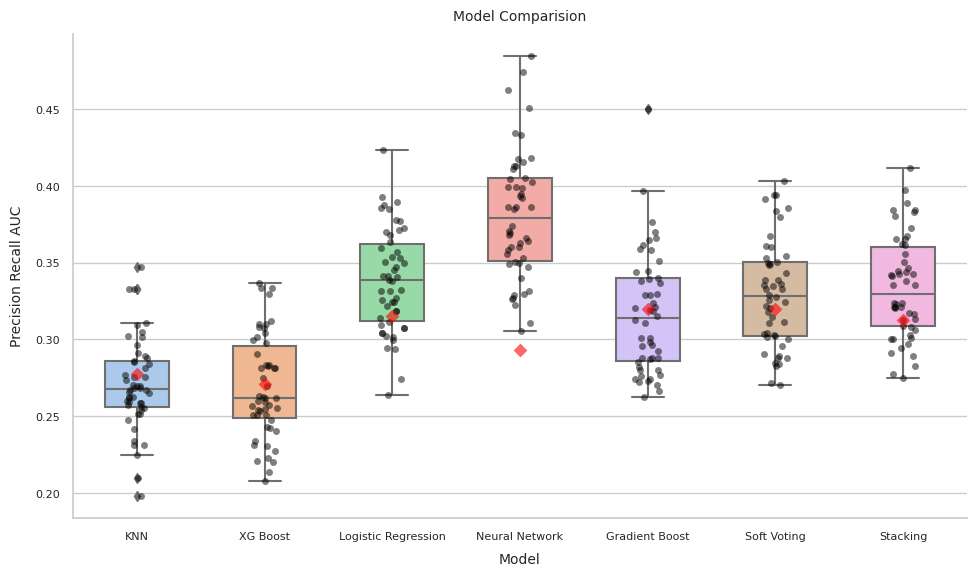

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = [
    #knn 
    [0.26188199393130035, 0.27004573810817434, 0.2694992503225729, 0.2551630012661197, 0.2586012674971601, 0.30116475570060836, 0.2695056704580086, 0.26687923295230975, 0.2891477661740872, 0.2312093444700976, 0.26693843786378674, 0.2243157546890571, 0.2880455746519299, 0.332803318268606, 0.2471272060717694, 0.3104133429109068, 0.27665347482970853, 0.2813438023061431, 0.26793530768898155, 0.2853232549658606, 0.30950119495236417, 0.2096862474338987, 0.26821789717977823, 0.2586134340096478, 0.2542360747102117, 0.26238178477789087, 0.25556025828588, 0.27526725217883014, 0.25744035758765893, 0.2338477855456168, 0.2597963709245301, 0.29632507480079073, 0.2647555826439088, 0.2592128054849234, 0.27371522437355045, 0.286044237626881, 0.30470901942606715, 0.2516053955790023, 0.3468028761961107, 0.19806854803603727, 0.29091838924780056, 0.2841855203394199, 0.26594437911779045, 0.24131470840439448, 0.30203897937164714, 0.3326597138452949, 0.2313513982048057, 0.27551309884376385, 0.2625559088665985, 0.2510347598050032],
    #XG
    [0.23373006710125366, 0.22002889379346846, 0.3043283332792035, 0.30991719172599597, 0.32976350639569174, 0.3336817965265315, 0.2628736688675108, 0.21381241645412907, 0.2615883241363813, 0.2573725662020155, 0.207862923619631, 0.2504866070515816, 0.33634040325061604, 0.28112430884577866, 0.25880510050833017, 0.28292310813254634, 0.27462096743350234, 0.24200474364758007, 0.2403862684682892, 0.25636997417391166, 0.31221340129393294, 0.24767604857738962, 0.25062562400135485, 0.26181838340464586, 0.2308976862283468, 0.2600283293654226, 0.2832024294170507, 0.2902278659613563, 0.30992939402108666, 0.24296939479800114, 0.26234120657068133, 0.2811437184747529, 0.25544921373259816, 0.2302041527765677, 0.2993455903154899, 0.28286131736215614, 0.22060074628563953, 0.28099509684914975, 0.3081955782396014, 0.2508088366783739, 0.3072468465938481, 0.22708137489036162, 0.30122103365578307, 0.2697833370931263, 0.2545874472768205, 0.297260429189029, 0.25370774973298593, 0.25314404386064776, 0.33324817369596554, 0.22291268941342648],
    #LR
    [0.304359059858775, 0.34998340220480634, 0.3112523517663998, 0.3700941970540661, 0.3708721335637062, 0.36319050643758155, 0.33173677050032135, 0.2997856451372715, 0.3453155984052022, 0.3596324371741583, 0.30707902442166163, 0.3019802696082036, 0.3182239529338129, 0.42300713837760234, 0.33224761721088325, 0.35670833080954994, 0.3679990784655324, 0.35315374872055694, 0.263622085442966, 0.34714860741621245, 0.38762491729892457, 0.29453835557656105, 0.2936095972183018, 0.3726277343077078, 0.32686409464140315, 0.3770118017591457, 0.3415073536681109, 0.2738635585509745, 0.34095352901533876, 0.32141098892174474, 0.3258095773870866, 0.3379423184341059, 0.3538957148106596, 0.3501790686427871, 0.3043577582158818, 0.3774677689441678, 0.30902055880069823, 0.3241049954239581, 0.3895900664992838, 0.31403484866513626, 0.33123923385552917, 0.34039080779222686, 0.3388858850123608, 0.3182177058673879, 0.38517888336506145, 0.38543278504624273, 0.3075619249941497, 0.30150382941540527, 0.39265601781410553, 0.3239948306006542],
    #NN
    [0.3265165604669005, 0.349318002819048, 0.35308235030885077, 0.3859078638739704, 0.4155849905074006, 0.3931695468922759, 0.33127584294659645, 0.33964329880785427, 0.38590822322119434, 0.37347556762735146, 0.3291022378879673, 0.3599114288219383, 0.3225221410219269, 0.47409886646026866, 0.34956036667942386, 0.38462849165026414, 0.41297221684859264, 0.417507841619825, 0.3055156967536457, 0.4021957106628148, 0.398942141865847, 0.32679437431649133, 0.3555179380393303, 0.39882547235599575, 0.36413638315430047, 0.40533562367555304, 0.3691123556070365, 0.31091108389838534, 0.4111406081794032, 0.39448414017733385, 0.34701660835982223, 0.4332495257668757, 0.37022498233848444, 0.4041105606099708, 0.329772676311478, 0.38603568755817286, 0.4128101459628857, 0.35799141334237194, 0.434326066466938, 0.36265593425026404, 0.4182922480750557, 0.3600570577175596, 0.3917951182151185, 0.39920752948076993, 0.4622061210188649, 0.48450510831318455, 0.3679786556796524, 0.3658539783048681, 0.4507557962953375, 0.3505220794454118],
    #GB
    [0.27978480974743847, 0.28803176010421166, 0.33964565190370616, 0.3964323980514589, 0.34466250828463874, 0.33950958771381623, 0.34391780312756864, 0.262621457665221, 0.3288197358720021, 0.33822540613888186, 0.2662778120712578, 0.2760835723493187, 0.3367146073363239, 0.45001217890703077, 0.273839066035762, 0.32037877615255134, 0.35095539530864683, 0.2980041536755427, 0.2801692939127861, 0.3208265174885092, 0.36991112857280195, 0.30089751967719297, 0.27405683896174576, 0.3287502684267688, 0.29243508401421636, 0.31903299393412504, 0.3613333007071185, 0.2821320887455845, 0.2962773783691569, 0.2958148094669302, 0.2876159348531316, 0.35830727137751084, 0.2868711710242126, 0.31510627402514785, 0.3181949778551382, 0.36457694594408374, 0.28802476293332135, 0.3005076991744001, 0.35865079921937226, 0.2704934187308193, 0.31061118199611076, 0.2727124144648201, 0.32336441771145813, 0.31226537545229993, 0.32931232876511635, 0.3762192059531769, 0.2764638898713364, 0.28537190143066743, 0.36617914703496196, 0.2723663108633346],
    #SV
    [0.28913093260615685, 0.3176392415776459, 0.33865640267979735, 0.38350516559564346, 0.3857002764741272, 0.39379700845431376, 0.31470323312356385, 0.2879355761533104, 0.33547206642472743, 0.3344013534856112, 0.2705129486604148, 0.28773323020229313, 0.3504469287760851, 0.4030543023766945, 0.32169239158211976, 0.3483622754206326, 0.3539517636180863, 0.32892435489692484, 0.28284584967135606, 0.3277611575624709, 0.37953559113300583, 0.30169382778315956, 0.2904659844348636, 0.3388783709726533, 0.3019426227684737, 0.34289550623237774, 0.3358715011723919, 0.303327666686701, 0.33280683340687056, 0.303804208534957, 0.3258949936627553, 0.3496926826396013, 0.3329609191267726, 0.3240683263723104, 0.31113223384292676, 0.3600743843944028, 0.28433189597397934, 0.32044593262653875, 0.3675332173052174, 0.300449168031108, 0.3531954176252953, 0.30274433958501346, 0.36102014915628533, 0.31076155770972214, 0.34933288806449797, 0.39377620827673354, 0.29555373770865767, 0.27163339396214164, 0.39132555760528165, 0.2841578656492323],
    #Stacking
    [0.30828978069765367, 0.343798168302532, 0.3024990906503224, 0.37244324439592175, 0.3621060082745221, 0.3425173189704659, 0.3127579198901261, 0.29986619408057935, 0.3463951319013106, 0.36500482077668606, 0.28929539145182925, 0.301058334552206, 0.32098378336043165, 0.4119009424944663, 0.32387770287610806, 0.3617290208761753, 0.3650543504932151, 0.3410275420263037, 0.2776267533351995, 0.3421799223931475, 0.38316467223291417, 0.28279800080582157, 0.308678076620574, 0.367095089053494, 0.3212540629120771, 0.3554017057456056, 0.3352674243264728, 0.27504849945547355, 0.344531367537768, 0.3133587050705793, 0.3207262108710167, 0.34249867829291253, 0.33822082747321663, 0.3351299515696396, 0.2969763426522304, 0.3842545269114456, 0.29083871513175646, 0.3231439499667997, 0.3889253426872323, 0.3162829832155528, 0.32388126858928357, 0.32055482200037094, 0.35022520328595164, 0.3170043716048848, 0.3800600691292034, 0.38414906675811017, 0.30048979831673905, 0.30603348435800537, 0.3973794775606681, 0.2945457085793086]
]

categories = ['KNN', 'XG Boost', 'Logistic Regression', 'Neural Network', 'Gradient Boost',  'Soft Voting', 'Stacking']

# custom values for each category
custom_values = [0.2773693107662063, 0.2705901706175817, 0.31532339789895136, 0.29301497674638266, 0.31967277698702457, 0.32002242661014807, 0.3128332853598304]

# create a list of values and categories for the boxplot
values = [item for sublist in data for item in sublist]
cats = [cat for cat in categories for i in range(len(data[0]))]

# create a dataframe for the data
df = pd.DataFrame({'Values': values, 'Category': cats})

# set seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# create the boxplot with custom styling
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Category', y='Values', data=df, width=0.5, palette='pastel')
sns.stripplot(x='Category', y='Values', data=df, jitter=True, size=5, alpha=0.5, color='black')
sns.stripplot(x=categories, y=custom_values, marker='D', size=7, color='red', edgecolor='black', alpha = 0.6)

# set plot labels and title
ax.set_xlabel('Model', fontsize=10, labelpad=8)
ax.set_ylabel('Precision Recall AUC', fontsize=10, labelpad=8)
ax.set_title('Model Comparision', fontsize=10, pad=10)

# set font size for tick labels
ax.tick_params(axis='both', labelsize=8)

# remove spines
sns.despine()

# adjust plot layout
plt.tight_layout()

# show the plot
plt.show()
